# <font color=red>EDA on personal gmail</font>
##### <font color=red>By: Sakshi Shrivastava </font>
<br>
<br>
<b>Objective:</b> The objective is to work with gmail time series data in Python, in which I visualize my personal Gmail account traffic since signing up in 2010.

- <b>Importing the required libraries</b>

In [2]:
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install mailbox

astroid 2.3.3 has requirement wrapt==1.11.*, but you'll have wrapt 1.12.1 which is incompatible.
albumentations 0.4.5 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.4.0 which is incompatible.
You are using pip version 10.0.1, however version 20.3b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
import mailbox
mboxfile = "data.mbox"

mbox = mailbox.mbox(mboxfile) # read in mbox
mbox

- __Looping over the keys to see what Google keeps track of.__

In [5]:
for key in mbox[0].keys():
  print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
DKIM-Signature
Received
Received
Content-Transfer-Encoding
Content-Type
Date
From
Mime-Version
To
Message-ID
Subject
X-SG-EID
X-Entity-ID
X-Feedback-ID


- __For the purposes of this analysis we only want to keep Subject, To, From, Date, and X-Gmail-Labels.Also keeping X-GM-THIRD which is a variable that keeps track of email threads.__

In [53]:
#Converting to csv for ease of use.
import csv

with open('data.csv', 'w',encoding="utf-8") as outputfile:
  writer = csv.writer(outputfile)
  writer.writerow(['subject','from','date','to','label','thread'])
  
  for message in mbox:
        writer.writerow([message['Subject'], message['From'],  message['Date'], message['To'],  message['X-Gmail-Labels'], message['X-GM-THRID']])

In [7]:
df= pd.read_csv('data.csv', names=['subject', 'from', 'date', 'to', 'label', 'thread'])

In [8]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

In [9]:
df = df[df['date'].notna()]

In [10]:
df.to_csv('gmail.csv')

> # <font color=green> Data Understanding and Manipulation</font>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24122 entries, 1 to 24512
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  23980 non-null  object             
 1   from     24122 non-null  object             
 2   date     24122 non-null  datetime64[ns, UTC]
 3   to       23257 non-null  object             
 4   label    24122 non-null  object             
 5   thread   24122 non-null  object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 1.3+ MB


In [12]:
df.head()

subject  \
1  Reminder | AMCAT | Shortlisted @ Edureka | Tec...   
2  Weekly Learning Schedule -Start the Hypothesis...   
3                                     Download mails   
4  Reminder | AMCAT | Shortlisted @ Edureka | Res...   
5                    Festive Ready Homes This Way...   

                                                from  \
1                          jobs@em.aspiringminds.com   
2  "Bhanushree from upGrad" <bhanushree.a@upgrad....   
3  Sakshi Shrivastava <sakshi.srivastav97@gmail.com>   
4                          jobs@em.aspiringminds.com   
5                        Myntra <updates@myntra.com>   

                       date  \
1 2020-11-05 08:03:15+00:00   
2 2020-11-04 18:02:40+00:00   
3 2020-11-07 16:58:17+00:00   
4 2020-11-05 06:37:27+00:00   
5 2020-11-05 07:33:27+00:00   

                                                  to  \
1                       sakshi.srivastav97@gmail.com   
2                       sakshi.srivastav97@gmail.com   
3  Sakshi Shrivastava <sakshi.srivastav97@gmail.com>   
4                       sakshi.srivastav97@gmail.com   
5                       sakshi.srivastav97@gmail.com   

                                     label               thread  
1            Inbox,Category updates,Unread  1682506667694488001  
2  Inbox,Important,Opened,Category updates  1682453782090274215  
3      Sent,Inbox,Important,Opened,Starred  1682721514877806351  
4            Inbox,Category updates,Unread  1682501270834650431  
5            Inbox,Category updates,Unread  1682504791876841586

In [13]:
df.columns

Index(['subject', 'from', 'date', 'to', 'label', 'thread'], dtype='object')

- __Applying extract_email function to the “from” column, drop the “to” column and simplify the “label” column to differentiate between sent and recieved mail.__

In [15]:
import re
def email_extract(string):
    email = re.findall("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)", string)
    if not email:
        email = list(filter(lambda y: '@' in y, string.split()))
    return email[0] if email else np.nan


In [16]:
df['from'] = df['from'].apply(lambda x: email_extract(x))

In [17]:
email = 'sakshi.srivastav97@gmail.com'
df['label'] = df['from'].apply(lambda x: 'sent_by_me' if x==email else 'inbox')

In [ ]:
df.drop(columns='to', inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24122 entries, 1 to 24512
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  23980 non-null  object             
 1   from     24122 non-null  object             
 2   date     24122 non-null  datetime64[ns, UTC]
 3   label    24122 non-null  object             
 4   thread   24122 non-null  object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 1.1+ MB


- __Convert all times from UTC to “local” timezones in date column.__

In [19]:
import pytz
import datetime 
df['date'] = df['date'].dt.tz_convert('Asia/Calcutta')

In [20]:
df.head()

subject  \
1  Reminder | AMCAT | Shortlisted @ Edureka | Tec...   
2  Weekly Learning Schedule -Start the Hypothesis...   
3                                     Download mails   
4  Reminder | AMCAT | Shortlisted @ Edureka | Res...   
5                    Festive Ready Homes This Way...   

                           from                      date       label  \
1     jobs@em.aspiringminds.com 2020-11-05 13:33:15+05:30       inbox   
2       bhanushree.a@upgrad.com 2020-11-04 23:32:40+05:30       inbox   
3  sakshi.srivastav97@gmail.com 2020-11-07 22:28:17+05:30  sent_by_me   
4     jobs@em.aspiringminds.com 2020-11-05 12:07:27+05:30       inbox   
5            updates@myntra.com 2020-11-05 13:03:27+05:30       inbox   

                thread  
1  1682506667694488001  
2  1682453782090274215  
3  1682721514877806351  
4  1682501270834650431  
5  1682504791876841586

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24122 entries, 1 to 24512
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype                        
---  ------   --------------  -----                        
 0   subject  23980 non-null  object                       
 1   from     24122 non-null  object                       
 2   date     24122 non-null  datetime64[ns, Asia/Calcutta]
 3   label    24122 non-null  object                       
 4   thread   24122 non-null  object                       
dtypes: datetime64[ns, Asia/Calcutta](1), object(4)
memory usage: 1.1+ MB


- __Extracting hour of day, week day, month, week day no.,year,timeofday from "date" column for analysis.__

In [ ]:
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.week
df['month_no'] = df['date'].dt.month
df['weekday'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.strftime('%b')
df['year'] = df['date'].dt.strftime('%Y')
df['day_of_week'] = df['date'].dt.day_name()
df['timeofday'] = df['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

- Looking at clean and final df.

df.head()

In [60]:
print(df.date.min().strftime('%a, %d %b %Y %I:%M %p'))
print(df.date.max().strftime('%a, %d %b %Y %I:%M %p'))

Tue, 22 Jun 2010 12:27 PM
Sat, 07 Nov 2020 10:28 PM


- The email history in this file starts on Tuesday June 22nd, 2010 and ends on Saturday, November 7, 2020 so we have a little over 10 years of email data on hand.

In [55]:
df['label'].value_counts()

inbox         23794
sent_by_me      328
Name: label, dtype: int64


- 23,794 emails received and 328 emails sent over this time period.

> # <font color=green> Plots</font>

- __Year wise total received mails__

In [27]:
year1=pd.DataFrame(df['year'].value_counts().reset_index())
year1=year1.rename(columns={"index": "year","year": "No of mails"})
year1
fig = px.bar(year1,x='year',y='No of mails', color='No of mails',height=800,text='No of mails')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Number of Mails')
fig.update_layout(title_text='Year wise mail count',template= "plotly_white",autosize=True,width=1000,height=500)
fig.update_traces(textposition='outside')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.show()

In [ ]:
- Mail count is increasing with wrt year.
- Maximum number of mails were received in 2019 followed by 2020(as we have data of 10 months so the number may increase).

- __Year wise sent and received mails__

In [28]:


year_sent=pd.DataFrame(sent['year'].value_counts().reset_index())
year_sent=year_sent.rename(columns={"index": "year","year": "No of mails"})

year_rec=pd.DataFrame(received['year'].value_counts().reset_index())
year_rec=year_rec.rename(columns={"index": "year","year": "No of mails"})

colors = ['green',] * 24
colors[0] = 'crimson'
colors[1] = 'crimson'
colors[2] = 'crimson'

colors1 = ['purple',] * 24
colors1[0] = 'orange'
colors1[1] = 'orange'
colors1[2] = 'orange'

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=1,subplot_titles=('Year wise recieved mails','Year wise sent mails'),
    specs=[[{"type": "bar"}],
           [{"type": "bar"}]])

# Add scattergeo globe map of volcano locations
fig.add_trace(
    go.Bar(x=year_rec['year'],
    y=year_rec['No of mails'],
    text=year_rec['No of mails'], marker_color=colors),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=year_sent['year'],
    y=year_sent['No of mails'],
    text=year_sent['No of mails'], marker_color=colors1),
    row=2, col=1
)
fig.update_layout(height=900, showlegend=False, title = 'Year wise recieved and sent mails',template= "plotly_white",width=900)
fig.update_traces(textposition='outside')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.show()


- Year wise received mail follows the same pattern as that of total mail count i.e. increasing wrt time.
- Highest no of mails were sent in 2019 and 2018 as 2018-19 was final year of college.Thus, increase in mails due to placement activities and assignments.

In [29]:

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

- __Month wise total received mails__

In [30]:
d1=pd.DataFrame(df['month'].value_counts().reset_index())
d1=d1.rename(columns={"index": "month","month": "No of mails"})
data = {'Month':months, 'No of mails':[1656, 2027, 1688, 1503,1754,1908, 2354, 2460,2324, 2517, 2077, 1854]} 
d2 = pd.DataFrame(data) 
fig = px.bar(d2,x='Month',y='No of mails', color='No of mails',height=800,text='No of mails')
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Number of Mails')
fig.update_layout(title_text='Month wise mail count',template= "plotly_white",autosize=False,width=1000,height=500)
fig.update_traces(textposition='outside')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.show()

- Maximum number of mailing activity is in October followed by August and July.

- __Month wise sent and received mails__

In [31]:


month_sent=pd.DataFrame(sent['month'].value_counts().reset_index())
month_sent=month_sent.rename(columns={"index": "month","month": "No of mails"})
data = {'month':months, 'No of mails':[32,19,20,59,42,10,18,32,22,40,16,18]} 
m1 = pd.DataFrame(data) 

month_rec=pd.DataFrame(received['month'].value_counts().reset_index())
month_rec=month_rec.rename(columns={"index": "month","month": "No of mails"})
data = {'month':months, 'No of mails':[1624,2008,1668,1444,1712,1898,2336,2428,2302,2477,2061,1836]} 
m2 = pd.DataFrame(data) 
colors = ['green',] * 24
colors[9] = 'crimson'
colors[7] = 'crimson'
colors[6] = 'crimson'

colors1 = ['blue',] * 24
colors1[3] = 'orange'
colors1[4] = 'orange'
colors1[9] = 'orange'

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=1,subplot_titles=('Month wise recieved mails','Month wise sent mails'),
    specs=[[{"type": "bar"}],
           [{"type": "bar"}]])

# Add scattergeo globe map of volcano locations
fig.add_trace(
    go.Bar(x=m2['month'],
    y=m2['No of mails'],
    text=m2['No of mails'], marker_color=colors),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=m1['month'],
    y=m1['No of mails'],
    text=m1['No of mails'], marker_color=colors1),
    row=2, col=1
)
fig.update_layout(height=1000, showlegend=False, title = 'Month wise recieved and sent mails',template= "plotly_white",width=900)
fig.update_traces(textposition='outside')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.show()


- Month wise received mail follows the same pattern as that of total mail count i.e. increasing wrt time.
- Highest no of mails were sent in April followed by May and October as these months are of submissions in college.

- __Day of week wise total received mails__

In [32]:
day=pd.DataFrame(df['day_of_week'].value_counts().reset_index())
day=day.rename(columns={"index": "day","day_of_week": "No of mails"})
data = {'day':days, 'No of mails':[3509, 3586, 3820, 3756,3458,3338,2655]} 
day2 = pd.DataFrame(data) 

fig = px.bar(day2,x='day',y='No of mails', color='No of mails',height=800,text='No of mails')
fig.update_layout(title_text='Day of week wise mail count',template= "plotly_white",autosize=True,width=1000,height=500)
fig.update_xaxes(title_text='Day of week')
fig.update_yaxes(title_text='Number of Mails')
fig.update_traces(textposition='outside')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.show()

- Saturday, Sunday less no. of mails received due to weekend thus less mailing activity.

- __Day of week wise sent and received mails__

In [33]:

day_sent=pd.DataFrame(sent['day_of_week'].value_counts().reset_index())
day_sent=day_sent.rename(columns={"index": "day_of_week","day_of_week": "No of mails"})
data = {'Day of week':days, 'No of mails':[74,34,51,55,46,36,32]} 
m1 = pd.DataFrame(data) 


day_rec=pd.DataFrame(received['day_of_week'].value_counts().reset_index())
day_rec=day_rec.rename(columns={"index": "day_of_week","day_of_week": "No of mails"})
data = {'Day of week':days, 'No of mails':[3435,3552,3769,3701,3412,3302,2623]} 
m2 = pd.DataFrame(data) 

colors = ['green',] * 24
colors[1] = 'crimson'
colors[2] = 'crimson'
colors[3] = 'crimson'

colors1 = ['blue',] * 24
colors1[0] = 'orange'
colors1[3] = 'orange'
colors1[2] = 'orange'

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=1,subplot_titles=('Day of week wise recieved mails','Day of week wise sent mails'),
    specs=[[{"type": "bar"}],
           [{"type": "bar"}]])

# Add scattergeo globe map of volcano locations
fig.add_trace(
    go.Bar(x=m2['Day of week'],
    y=m2['No of mails'],
    text=m2['No of mails'], marker_color=colors),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=m1['Day of week'],
    y=m1['No of mails'],
    text=m1['No of mails'], marker_color=colors1),
    row=2, col=1
)
fig.update_layout(height=1000, showlegend=False, title = 'Day of week wise recieved and sent mails',template= "plotly_white",width=900)
fig.update_traces(textposition='outside')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.show()

- Maximum mails are sent on Monday as it is the beginning of the week and work.

- __Hour of Day wise total received mails__

In [34]:
hour=pd.DataFrame(df['hour'].value_counts().reset_index())
hour=hour.rename(columns={"index": "hour","hour": "No of mails"})

colors = ['green',] * 24
colors[0] = 'crimson'
colors[1] = 'crimson'
colors[2] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x=hour['hour'],
    y=hour['No of mails'],
    text=hour['No of mails'],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Hour wise mail count',template= "plotly_white",autosize=True,width=900,height=500)
fig.update_xaxes(title_text='Hour of the day')
fig.update_yaxes(title_text='Number of Mails')
fig.update_traces(textposition='outside')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.show()

- Maximum mailing activity is done between 12 PM to 4 PM as these are the working hours.

- __Hour wise sent and received mails__

In [35]:


hour_sent=pd.DataFrame(sent['hour'].value_counts().reset_index())
hour_sent=hour_sent.rename(columns={"index": "hour","hour": "No of mails"})

hour_rec=pd.DataFrame(received['hour'].value_counts().reset_index())
hour_rec=hour_rec.rename(columns={"index": "hour","hour": "No of mails"})

colors = ['green',] * 24
colors[0] = 'crimson'
colors[1] = 'crimson'
colors[2] = 'crimson'

colors1 = ['purple',] * 24
colors1[0] = 'orange'
colors1[1] = 'orange'
colors1[2] = 'orange'

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=1,subplot_titles=('Hour wise recieved mails','Hour wise sent mails'),
    specs=[[{"type": "bar"}],
           [{"type": "bar"}]])

# Add scattergeo globe map of volcano locations
fig.add_trace(
    go.Bar(x=hour_rec['hour'],
    y=hour_rec['No of mails'],
    text=hour_rec['No of mails'], marker_color=colors),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=hour_sent['hour'],
    y=hour_sent['No of mails'],
    text=hour_sent['No of mails'], marker_color=colors1),
    row=2, col=1
)
fig.update_layout(height=900, showlegend=False, title = 'Hour wise recieved and sent mails',template= "plotly_white",width=900)
fig.update_traces(textposition='outside')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.show()


- __Top Mail sending Usernames.__

In [36]:

received1 = received[received['from'] != 'no-reply@arXiv.org']
top20=pd.DataFrame(received1['from'].value_counts().sort_values(ascending=False)[:20]).reset_index()
top20=top20.rename(columns={"index": "from","from":"No of mails"})
top20 = top20.iloc[::-1]
fig = px.bar(top20,x='No of mails',y='from', color='No of mails',height=800,text='No of mails', orientation='h')
fig.update_layout(title_text='Count of mails received from top 20 usernames',template= "plotly_white",autosize=True,width=1100,height=500,showlegend=False)
fig.update_xaxes(title_text='Mail Count')
fig.update_yaxes(title_text='Top 20 Username')
fig.update_traces(textposition='outside')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.show()

- __Top 10 mail subjects i am receiving.__

In [37]:
received1 = received[received['from'] != 'no-reply@arXiv.org']
top20=pd.DataFrame(received1['subject'].value_counts().sort_values(ascending=False)[:10]).reset_index()
top20=top20.rename(columns={"index": "subject","subject":"No of mails"})
top20 = top20.iloc[::-1]
fig = px.bar(top20,x='No of mails',y='subject', color='No of mails',height=800,text='No of mails', orientation='h')
fig.update_layout(title_text='Count of Top 10 Subjects',template= "plotly_white",autosize=True,width=1100,height=500,showlegend=False)
fig.update_xaxes(title_text='Mail Count')
fig.update_yaxes(title_text='Top 10 Subjects')
fig.update_traces(textposition='outside')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='crimson', size=15))
fig.show()

- Highest number of mails are received from twitter with subject 'check out the notifications you have on twitter'.

- __Word Cloud of Subjects of sent mails.__

In [64]:
# remove arxiv emailers
df_no_arxiv = df[df['from'] != 'no-reply@arXiv.org']
text = ' '.join(map(str, sent['subject'].values))

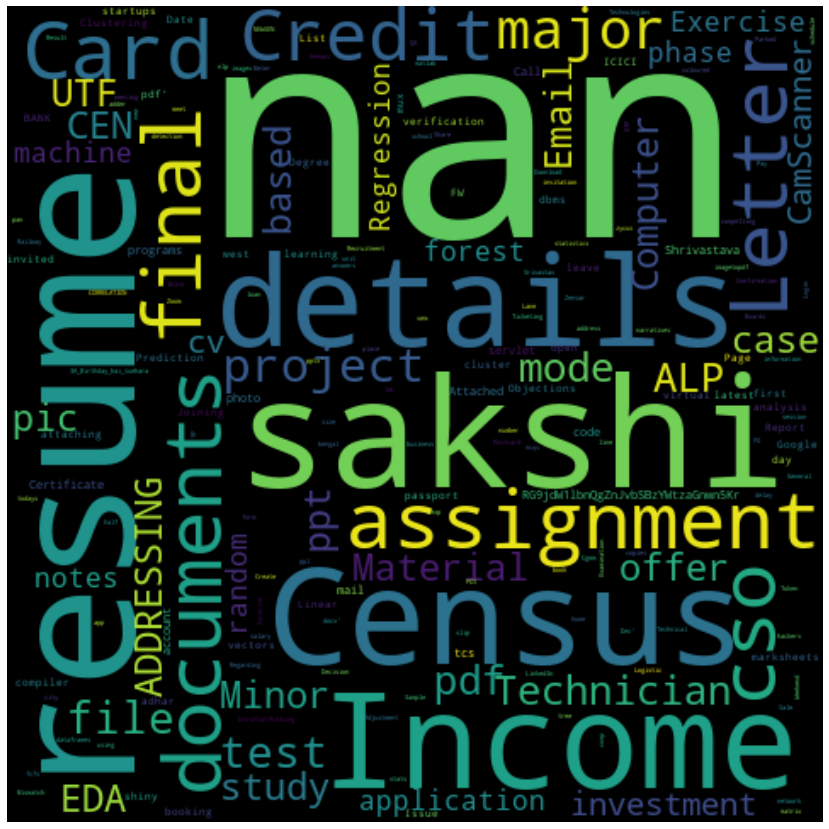

In [65]:
# Creating wordcloud
from wordcloud import WordCloud, STOPWORDS 
stopwords = ['Re', 'Fwd']
wrd = WordCloud(width=480, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

# Display the generated image:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

- Top words are resume,test,study,assignment because of frequent mailing activity in final year of college.
- Words income,eda,investment,project clearlt indicated i work as data science engineer (and data science intern before)and have done analytics projects.

Text(688.8545454545454, 0.5, 'Month')

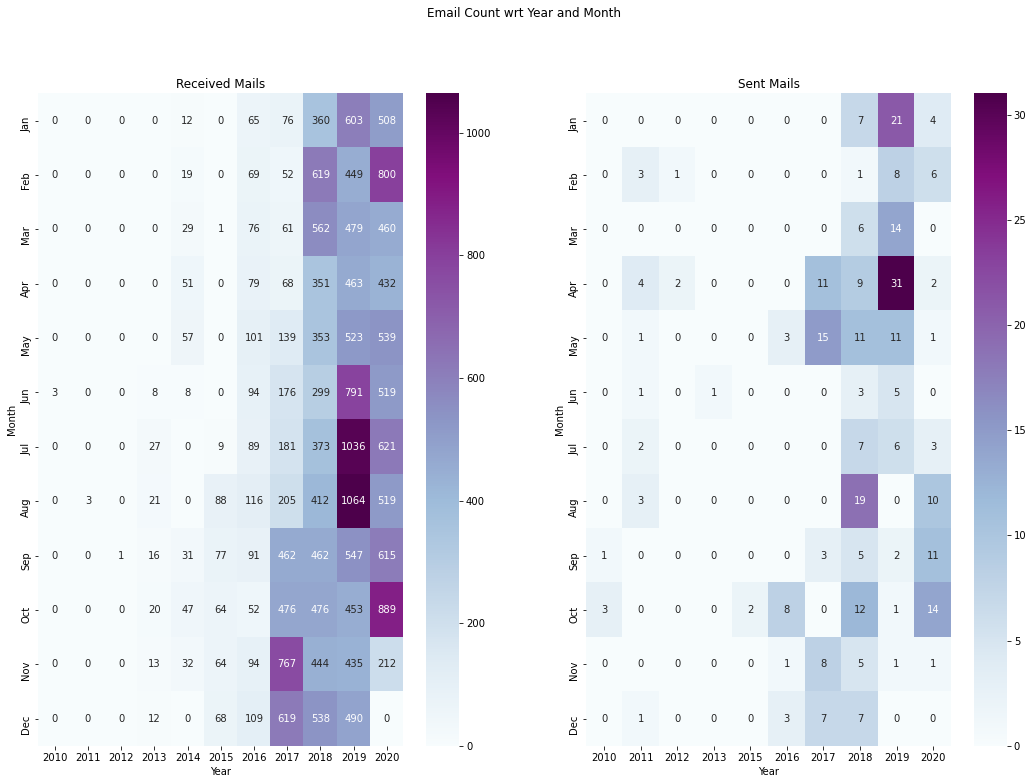

In [47]:
p1=pd.crosstab( received.month_no,received.year)
p2=pd.crosstab( sent.month_no,sent.year)
fig, ax = plt.subplots(1, 2, figsize=(18,12))
plt.suptitle('Email Count wrt Year and Month')
ax[0].set_title('Received Mails')
ax[1].set_title('Sent Mails')
sns.heatmap(p1, ax=ax[0],annot=True,fmt='d',cmap='BuPu')
sns.heatmap(p2, ax=ax[1],annot=True,fmt='d',cmap='BuPu')
ax[0].set_yticklabels(months)
ax[1].set_yticklabels(months)
ax[0].set_xlabel('Year')
ax[1].set_xlabel('Year')
ax[0].set_ylabel('Month')
ax[1].set_ylabel('Month')


- Maximum number of mails are received and sent in the years 2018 and 2019 as it was the time of college final year and there were placement activities and i joined as an intern at the end of 2018.

In [48]:

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools

p1=pd.crosstab(received.weekday, received.month_no)
p2=pd.crosstab(sent.weekday, sent.month_no)

# x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
# y=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
fig1 = ff.create_annotated_heatmap(p1.values.tolist(),months, days,  colorscale='matter')
fig2 = ff.create_annotated_heatmap(p2.values.tolist(),months, days,  colorscale='Viridis')

fig = make_subplots(
    rows=1, cols=2,
    horizontal_spacing=0.16,subplot_titles=('Received Mails','Sent Mails')
    
)

fig.add_trace(fig1.data[0], 1, 1)
fig.add_trace(fig2.data[0], 1, 2)

annot1 = list(fig1.layout.annotations)
annot2 = list(fig2.layout.annotations)
for k  in range(len(annot2)):
    annot2[k]['xref'] = 'x2'
    annot2[k]['yref'] = 'y2'
fig.update_layout(annotations=annot1+annot2,width=1070,title='Email Count wrt Month and Year')  

fig.update_xaxes(tickfont=dict(family='Rockwell', color='crimson', size=15),title_text='Month')
fig.update_yaxes(tickfont=dict(family='Rockwell', color='crimson', size=15),title_text='Day of Week')

- More mails are received from July to December as it was the time of placments activity in the college.
- Monday has more load for sent mails as it is the starting day of the week.

Text(767.7272727272725, 0.5, 'Hour')

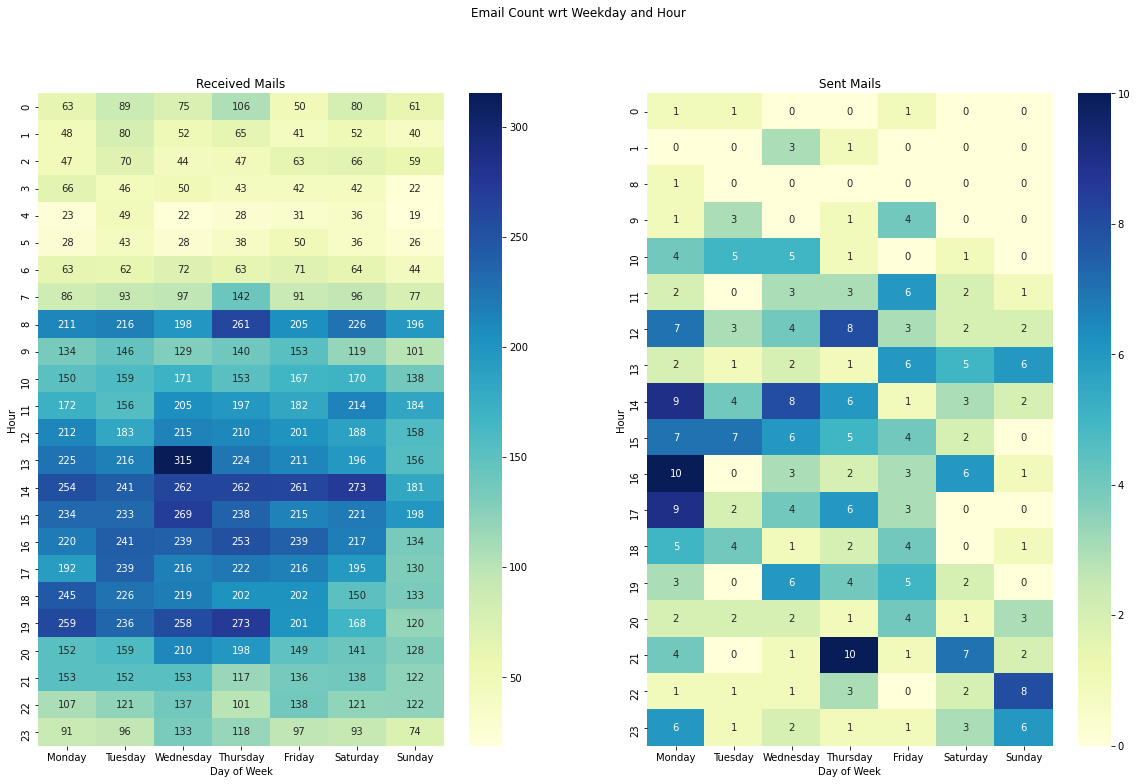

In [49]:
p1=pd.crosstab( received.hour,received.weekday)
p2=pd.crosstab( sent.hour,sent.weekday)
fig, ax = plt.subplots(1, 2, figsize=(20,12))
plt.suptitle('Email Count wrt Weekday and Hour')
ax[0].set_title('Received Mails')
ax[1].set_title('Sent Mails')
sns.heatmap(p1, ax=ax[0],annot=True,fmt='d',cmap='YlGnBu')
sns.heatmap(p2, ax=ax[1],annot=True,fmt='d',cmap='YlGnBu')
ax[0].set_xticklabels(days)
ax[1].set_xticklabels(days)
ax[0].set_xlabel('Day of Week')
ax[1].set_xlabel('Day of Week')
ax[0].set_ylabel('Hour')
ax[1].set_ylabel('Hour')


- Heatmap of received mails clearly show that maximum mailing activity is during weekdays and after the 7 in morning till 12 in night as these are the hours when people are usually awake and working.
- Heatmap of sent mails clearly show that majority of mails were sent in week days that too in between 9AM and 12 at night because I am usually awake and working during these hours.

Text(688.8545454545454, 0.5, 'Hour of the Day')

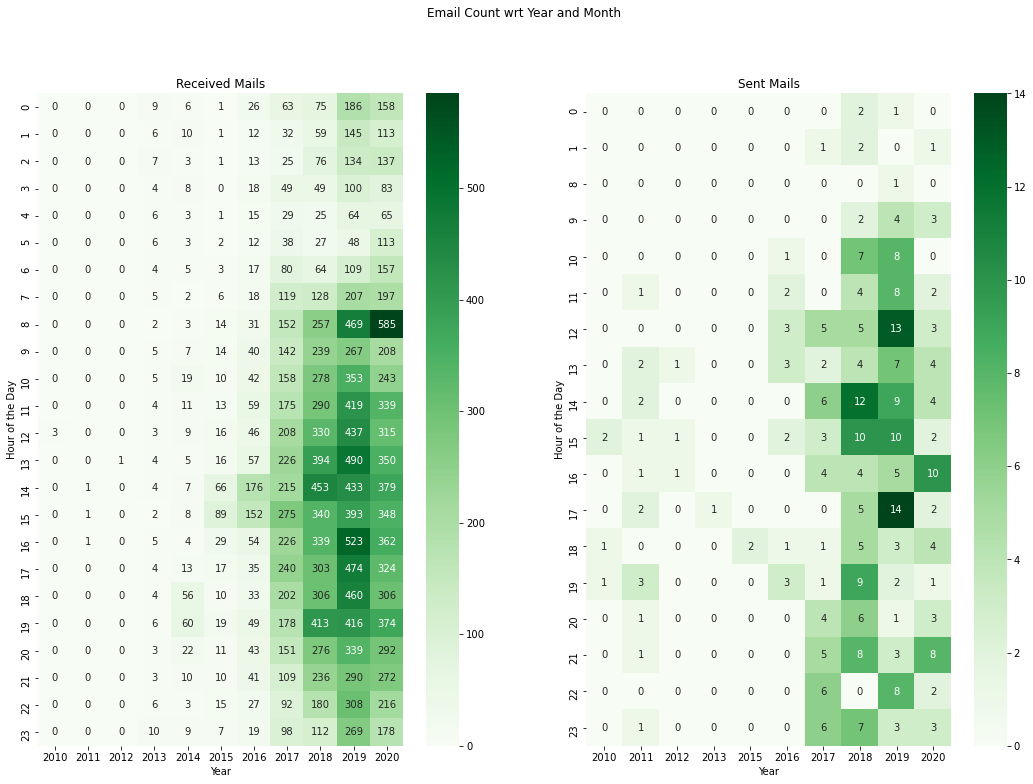

In [52]:
p1=pd.crosstab( received.hour,received.year)
p2=pd.crosstab( sent.hour,sent.year)
fig, ax = plt.subplots(1, 2, figsize=(18,12))
plt.suptitle('Email Count wrt Year and Month')
ax[0].set_title('Received Mails')
ax[1].set_title('Sent Mails')
sns.heatmap(p1, ax=ax[0],annot=True,fmt='d',cmap='Greens')
sns.heatmap(p2, ax=ax[1],annot=True,fmt='d',cmap='Greens')
ax[0].set_xlabel('Year')
ax[1].set_xlabel('Year')
ax[0].set_ylabel('Hour of the Day')
ax[1].set_ylabel('Hour of the Day')

- Email activities increased after the year 2016 (due to digitization, increase in ecommerce,payment activities,etc.)
- Time of email activities are from 7 in morning till 12 at night as its sleeping time between 12 AM to 6 or 7 AM.
- I received maximum mail at 8 AM in 2020 which were usually from the ecommerce sites as i purchased a lot of stuff.